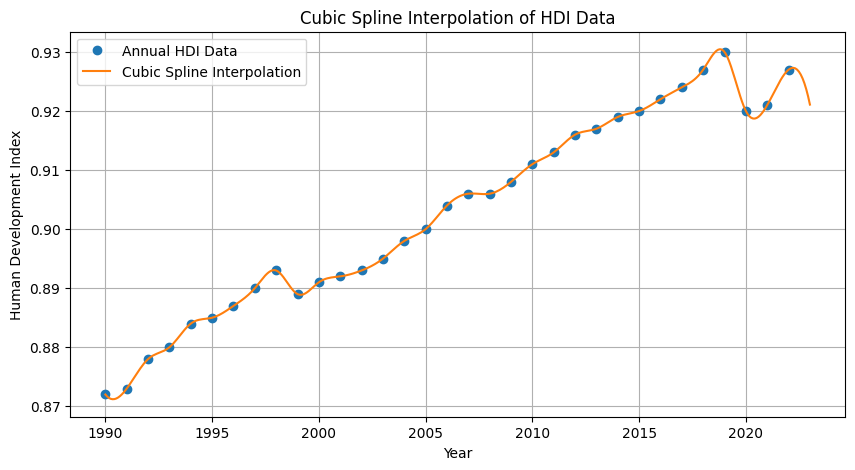

In [8]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel('HDI yearly data.xlsx')

# and the column names are 'Year' and 'Human Development Index'
cs = CubicSpline(data['Year'], data['Human Development Index'])

# Generate monthly points within the range of years
monthly_years = np.linspace(data['Year'].min(), data['Year'].max()+1, (data['Year'].max() - data['Year'].min()) * 12 + 1)

# Evaluate the spline interpolation at these points
monthly_hdi = cs(monthly_years)

# Ensure the content is drawn before saving
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Human Development Index'], 'o', label='Annual HDI Data')
plt.plot(monthly_years, monthly_hdi, label='Cubic Spline Interpolation')
plt.title('Cubic Spline Interpolation of HDI Data')
plt.xlabel('Year')
plt.ylabel('Human Development Index')
plt.legend()
plt.grid(True)

# Make sure to draw the canvas before saving
plt.gcf().canvas.draw()

# Save the figure with a transparent background and make sure it includes all plot elements
plt.savefig('spline_plot.png', bbox_inches='tight', format='png')

# Close the plot to free up memory
#plt.close()

plt.show()

In [2]:
# Create a DataFrame for the interpolated data
interpolated_data = pd.DataFrame({
    'Year': monthly_years,
    'Interpolated HDI': monthly_hdi
})

# Save the interpolated data to a CSV file
interpolated_data.to_excel('interpolated_hdiV2.xlsx', index=False)

In [3]:
interpolated_data

,Year,Interpolated HDI
0,1990.000000,0.872000
1,1990.085938,0.871650
2,1990.171875,0.871405
3,1990.257812,0.871257
4,1990.343750,0.871199
...,...,...
380,2022.656250,0.925517
381,2022.742188,0.924692
382,2022.828125,0.923686
383,2022.914062,0.922489


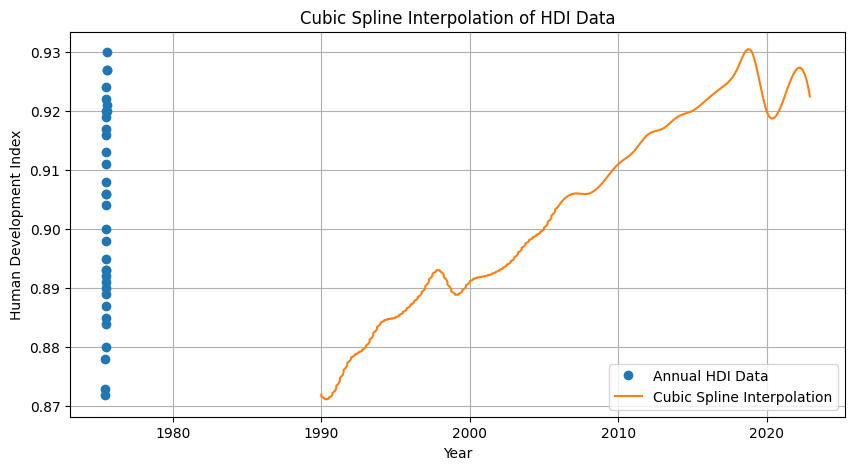

In [13]:
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

# Load your data
data = pd.read_excel('HDI yearly data.xlsx')

# Convert 'Year' to datetime for consistent handling later
#data['Year'] = pd.to_datetime(data['Year'].astype(str), format='%Y')

# Fit cubic spline using only the year part for simplicity in calculations
#cs = CubicSpline(data['Year'].dt.year, data['Human Development Index'])
cs = CubicSpline(data['Year'], data['Human Development Index'])


monthly_years = np.linspace(data['Year'].min(), 2022 + 1/12 * 11, (2022 - data['Year'].min() + 1) * 12)

# Generate monthly points within the range of years
#monthly_years = np.linspace(data['Year'].dt.year.min(), data['Year'].dt.year.max() + 1, 
                            #num=(data['Year'].dt.year.max() - data['Year'].dt.year.min()) * 12 + 1)

# Evaluate the spline interpolation at these points
monthly_hdi = cs(monthly_years)

# Convert these numerical years back into datetime for plotting and further analysis
# Calculate the fractional part of the year and convert it to months (1-12 range)
months = (np.mod(monthly_years, 1) * 12).astype(int) + 1
full_dates = [pd.Timestamp(year=int(year), month=month, day=1) for year, month in zip(monthly_years.astype(int), months)]

# Create a DataFrame for plotting and analysis
interpolated_df = pd.DataFrame({
    'Date': full_dates,
    'Interpolated HDI': monthly_hdi
})
interpolated_df.set_index('Date', inplace=True)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Human Development Index'], 'o', label='Annual HDI Data')
plt.plot(interpolated_df.index, interpolated_df['Interpolated HDI'], label='Cubic Spline Interpolation')
plt.title('Cubic Spline Interpolation of HDI Data')
plt.xlabel('Year')
plt.ylabel('Human Development Index')
plt.legend()
plt.grid(True)
plt.savefig('spline_plot.png', bbox_inches='tight', format='png', transparent=True)
plt.show()


In [7]:
interpolated_df.to_csv('v3.csv')

In [9]:
interpolated_df

,Interpolated HDI
Date,
1990-01-01,0.872000
1990-02-01,0.871650
1990-03-01,0.871405
1990-04-01,0.871257
1990-05-01,0.871199
...,...
2022-08-01,0.925517
2022-09-01,0.924692
2022-10-01,0.923686


In [11]:
data['Year'].min()

Timestamp('1990-01-01 00:00:00')